<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/Fundamental_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

19:42:30 Starting...
19:42:30 Installing yfinance into Google notebook...
19:42:54 Installing arch into Google notebook...
19:43:10 Initialized.


In [2]:
from requests import get
from io import StringIO
ics=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/ics.csv").text.split("\n")[5:])))\
    .set_index('Ticker').rename(columns={"Sharpe Ratio":("Expected","Sharpe"),"Sharpe Std.Err":("Expected","Std.Err.")})
ics.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),ics.columns))
nprint("Loaded IC data.")
display(ics)

19:43:13 Loaded IC data.


IC Sample  Std.Error t Statistic   p Value  Expected            \
                                                             Sharpe  Std.Err.   
Ticker                                                                          
TLT     16.294625    236   6.551218    2.487267  0.006436  2.586692  1.033342   
TBT     15.125077    236   6.551218    2.308743  0.010479  2.401032  1.033342   
TBX     14.658466    173   7.669650    1.911230  0.027988  2.326959  1.206916   
TLH     13.841704     79  11.470787    1.206692  0.113775  2.197302  1.786022   
PST     13.161656    173   7.669650    1.716070  0.043075  2.089348  1.206916   
IEF     11.621618    208   6.984303    1.663962  0.048060  1.844875  1.100699   
BND      9.965509    185   7.412493    1.344421  0.089406  1.581976  1.167117   
IEI      8.606282    208   6.984303    1.232232  0.108931  1.366205  1.100699   
GLD     -0.452115    224   6.726728   -0.067212  0.526793 -0.071771  1.060660   
DIA     -0.924322    236   6.551218   -0.141092  0.556101 -0.146732  1.033342   
UUP     -1.754910    218   6.819943   -0.257320  0.601534 -0.278583  1.075157   
UDOW    -2.000817    236   6.551218   -0.305411  0.619974 -0.317620  1.033342   
TQQQ    -2.147313    236   6.551218   -0.327773  0.628458 -0.340875  1.033342   
QQQ     -2.184140    236   6.551218   -0.333395  0.630582 -0.346722  1.033342   
SPY     -2.882906    236   6.551218   -0.440056  0.670052 -0.457647  1.033342   
IWM     -3.133418    225   6.711561   -0.466869  0.679703 -0.497415  1.058301   
RWM     -3.440395    225   6.711561   -0.512607  0.695887 -0.546146  1.058301   
SH      -3.626407    236   6.551218   -0.553547  0.710056 -0.575674  1.033342   
SPXL    -3.730236    236   6.551218   -0.569396  0.715456 -0.592157  1.033342   
DOG     -4.329022    236   6.551218   -0.660797  0.745629 -0.687211  1.033342   
UDN     -7.210961    214   6.884284   -1.047453  0.852555 -1.144705  1.085159   

             First        Last Significance  
                                             
Ticker                                       
TLT     2023-01-30  2024-01-05           **  
TBT     2023-01-30  2024-01-05            *  
TBX     2023-05-01  2024-01-05            *  
TLH     2023-09-14  2024-01-05          NaN  
PST     2023-05-01  2024-01-05            *  
IEF     2023-03-10  2024-01-05            *  
BND     2023-04-13  2024-01-05          NaN  
IEI     2023-03-10  2024-01-05          NaN  
GLD     2023-02-15  2024-01-05          NaN  
DIA     2023-01-30  2024-01-05          NaN  
UUP     2023-02-24  2024-01-05          NaN  
UDOW    2023-01-30  2024-01-05          NaN  
TQQQ    2023-01-30  2024-01-05          NaN  
QQQ     2023-01-30  2024-01-05          NaN  
SPY     2023-01-30  2024-01-05          NaN  
IWM     2023-02-14  2024-01-05          NaN  
RWM     2023-02-14  2024-01-05          NaN  
SH      2023-01-30  2024-01-05          NaN  
SPXL    2023-01-30  2024-01-05          NaN  
DOG     2023-01-30  2024-01-05          NaN  
UDN     2023-02-24  2024-01-05          NaN

In [3]:
srs=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/sharpes.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker","Sharpe":("Actual","Sharpe"),"Std.Err.":("Actual","Std.Err.")}).set_index("Ticker")
srs.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),srs.columns))
nprint("Loaded Sharpe Ratio data.")
display(srs)

19:43:13 Loaded Sharpe Ratio data.


Mean  Std.Dev. Sample    Kurtosis   t Score   p Value Annualized  \
                                                                               
Ticker                                                                         
TBX     0.032012  0.259985    238   10.057353  1.899550  0.029353   8.399883   
QQQ     0.127628  1.096305    238    2.840149  1.795982  0.036886  37.908010   
Total   0.083731  0.775274    238    4.114847  1.666160  0.048501  23.480445   
TBT     0.114466  1.083166    238   15.536725  1.630308  0.052182  33.414278   
TQQQ    0.268420  2.768011    238    3.589098  1.496016  0.067990  96.504078   
SPY     0.066876  0.771601    238    2.906630  1.337097  0.091237  18.349266   
TLH     0.040469  0.475785    238    9.620396  1.312199  0.095361  10.734034   
DIA     0.044568  0.685673    238    3.230334  1.002743  0.158504  11.883184   
DOG     0.002478  0.038228    238  241.000000  1.000000  0.159165   0.626384   
PST     0.024816  0.413601    238   14.648042  0.925651  0.177785   6.452609   
SPXL    0.137112  2.360242    238    2.739605  0.896208  0.185525  41.239487   
BND     0.015507  0.334590    238    5.128565  0.714991  0.237659   3.984784   
GLD     0.034410  0.763722    238    4.994339  0.695094  0.243839   9.056890   
TLT     0.037980  0.940055    238    3.911221  0.623294  0.266845  10.042012   
UDOW    0.072876  2.061290    238    3.192637  0.545423  0.292988  20.151139   
IEI     0.008539  0.258505    238    5.541550  0.509605  0.305401   2.175089   
UUP     0.006385  0.318205    238    6.933827  0.309542  0.378591   1.621899   
IWM     0.016340  1.143047    238    5.175999  0.220533  0.412823   4.203258   
IEF    -0.002193  0.429038    238    4.530408 -0.078839  0.531386  -0.551001   
SH     -0.003052  0.107202    238   87.572652 -0.439139  0.669519  -0.766045   
UDN    -0.005102  0.156305    238    9.939653 -0.503610  0.692499  -1.277622   
RWM    -0.013222  0.367981    238   33.807593 -0.554336  0.710064  -3.277348   

          Actual           Significance  
          Sharpe  Std.Err.               
Ticker                                   
TBX     1.954621  3.196671            *  
QQQ     1.848050  1.649971            *  
Total   1.714465  1.866120            *  
TBT     1.677573  3.447889          NaN  
TQQQ    1.539387  1.637958          NaN  
SPY     1.375861  1.419229          NaN  
TLH     1.350242  2.284518          NaN  
DIA     1.031814  1.298987          NaN  
DOG     1.028992  8.265909          NaN  
PST     0.952487  2.082401          NaN  
SPXL    0.922191  1.204340          NaN  
BND     0.735720  1.284666          NaN  
GLD     0.715246  1.264803          NaN  
TLT     0.641364  1.172951          NaN  
UDOW    0.561235  1.114290          NaN  
IEI     0.524379  1.178724          NaN  
UUP     0.318516  1.103711          NaN  
IWM     0.226927  1.056290          NaN  
IEF    -0.081124  1.031976          NaN  
SH     -0.451870  2.395416          NaN  
UDN    -0.518211  1.301651          NaN  
RWM    -0.570407  1.970888          NaN

In [4]:
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

ics[list(map(lambda x:("Actual",x),srs["Actual"].columns))]=srs["Actual"]
data=ics.xs("Sharpe",axis=1,level=1)
display(data)
model=OLS(data["Actual"],add_constant(data["Expected"])).fit()
nprint("Naive Regression Analysis\n",model.summary())

,Expected,Actual
Ticker,,
TLT,2.586692,0.641364
TBT,2.401032,1.677573
TBX,2.326959,1.954621
TLH,2.197302,1.350242
PST,2.089348,0.952487
IEF,1.844875,-0.081124
BND,1.581976,0.735720
IEI,1.366205,0.524379
GLD,-0.071771,0.715246


19:43:18 Naive Regression Analysis
                             OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.557
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.126
Time:                        19:43:18   Log-Likelihood:                -21.840
No. Observations:                  21   AIC:                             47.68
Df Residuals:                      19   BIC:                             49.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

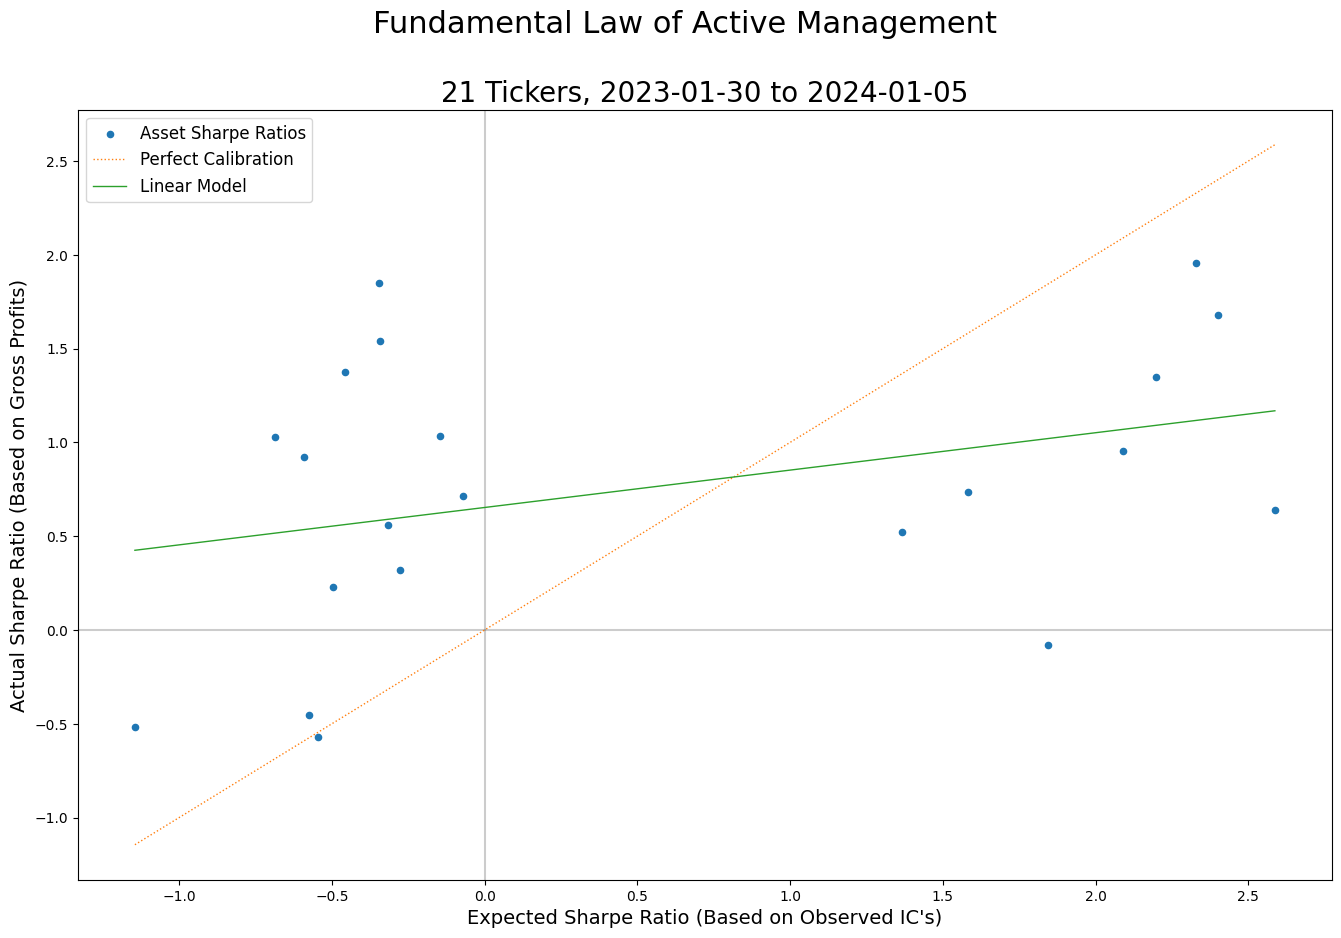

In [5]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data.plot.scatter("Expected","Actual",ax=plot,label="Asset Sharpe Ratios",color='C0')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
x=[data["Expected"].min(),data["Expected"].max()]
y=list(map(lambda x:model.params[0]+model.params[1]*x,x))
plot.plot(x,x,':',label="Perfect Calibration",color='C1',linewidth=1)
plot.plot(x,y,'-',label="Linear Model",color='C2',linewidth=1)
plot.legend(fontsize=12)
plot.set_xlabel(plot.get_xlabel()+" Sharpe Ratio (Based on Observed IC's)",fontsize=14)
plot.set_ylabel(plot.get_ylabel()+" Sharpe Ratio (Based on Gross Profits)",fontsize=14)
title="Fundamental Law of Active Management"
figure.suptitle(title,fontsize=22)
plot.set_title("%d Tickers, %s to %s" % (data.shape[0],ics["First"].min(),ics["Last"].max()),fontsize=20)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')